In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [20]:
df=pd.read_csv("/content/drive/MyDrive/quarter_data_domestic_1.csv")
print('Number of rows and columns:', df.shape)
df.head(5)

Number of rows and columns: (125, 2)


,Year,DomesticDebt_adjust
0,1990-03-31,13507.410336
1,1990-06-30,14167.597438
2,1990-09-30,14827.794085
3,1990-12-31,15487.998142
4,1991-03-31,16148.210336


In [21]:
training_set = df.iloc[:60, 1:2].values
test_set = df.iloc[60:, 1:2].values

In [22]:
training_set

array([[ 13507.41033566],
       [ 14167.59743779],
       [ 14827.79408454],
       [ 15487.99814202],
       [ 16148.21033566],
       [ 15998.69743779],
       [ 15849.19408454],
       [ 15699.69814202],
       [ 15550.21033566],
       [ 17722.52243779],
       [ 19894.84408454],
       [ 22067.17314202],
       [ 24239.51033566],
       [ 27603.34743779],
       [ 30967.19408454],
       [ 34331.04814202],
       [ 37694.91033566],
       [ 36763.97243779],
       [ 35833.04408454],
       [ 34902.12314202],
       [ 33971.21033566],
       [ 37916.64743779],
       [ 41862.09408454],
       [ 45807.54814202],
       [ 49753.01033566],
       [ 44883.24743779],
       [ 40013.49408454],
       [ 35143.74814202],
       [ 30274.01033566],
       [ 40545.69743779],
       [ 50817.39408454],
       [ 61089.09814202],
       [ 71360.81033566],
       [ 72239.29743779],
       [ 73117.79408454],
       [ 73996.29814202],
       [ 74874.81033566],
       [ 85780.84743779],
       [ 966

In [23]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(10, 60):
    X_train.append(training_set_scaled[i-10:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [24]:
#Creating the LSTM Model
model = Sequential()
model.add(LSTM(500,input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))


# Defining the optimizer with the learning rate
learning_rate = 0.0001
optimizer = Adam(learning_rate=learning_rate)

#Compiling the model
model.compile(loss='mse',optimizer=optimizer)


In [25]:
#Training the model
history=model.fit(X_train,y_train,epochs=100,batch_size=1)

Epoch 1/100
50/50 [==============================] - 2s 4ms/step - loss: 0.1017
Epoch 2/100
50/50 [==============================] - 0s 4ms/step - loss: 0.0385
Epoch 3/100
50/50 [==============================] - 0s 4ms/step - loss: 0.0245
Epoch 4/100
50/50 [==============================] - 0s 4ms/step - loss: 0.0264
Epoch 5/100
50/50 [==============================] - 0s 4ms/step - loss: 0.0230
Epoch 6/100
50/50 [==============================] - 0s 4ms/step - loss: 0.0217
Epoch 7/100
50/50 [==============================] - 0s 4ms/step - loss: 0.0203
Epoch 8/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0231
Epoch 9/100
50/50 [==============================] - 0s 4ms/step - loss: 0.0212
Epoch 10/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0215
Epoch 11/100
50/50 [==============================] - 0s 4ms/step - loss: 0.0199
Epoch 12/100
50/50 [==============================] - 0s 4ms/step - loss: 0.0224
Epoch 13/100
50/50 [=================

In [26]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:60, 1:2]
dataset_test = df.iloc[60:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 10:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
y_test=[]
for i in range(10, 47):
    X_test.append(inputs[i-10:i, 0])
    y_test.append(inputs[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
#X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#y_test = np.reshape(y_test,(y_test.shape[0],y_test.shape[1],1))
print(X_test.shape)
# (459, 60, 1)

(37, 10, 1)


In [27]:
predicted_value = model.predict(X_test)
original_predicted_value = sc.inverse_transform(predicted_value)

2/2 [==============================] - 0s 6ms/step


In [28]:
predicted_value.shape

(37, 1)

In [29]:
dataset_test.shape

(65, 1)

In [30]:
# Calculate mean absolute percentage error (MAPE) for each prediction
mape = np.mean(np.abs((y_test - predicted_value) / y_test) * 100, axis=1)
mape

# Print the computed MAPE values for each prediction
#for i, mape_value in enumerate(mape):
 #   print(f"MAPE for prediction {i+1}: {mape_value:.2f}")

array([46.01639593, 45.42422756, 43.18814091, 40.13932504, 38.06003456,
       37.16275304, 39.30598652, 43.63204044, 46.90532301, 47.88263263,
       39.11404349, 30.72455735, 28.34702881, 28.39487624, 32.24409001,
       45.57974227, 49.17723162, 40.20694923, 37.29348952, 46.93307437,
       59.21959297, 63.3821655 , 58.85852074, 51.72855519, 48.42180227,
       48.61831467, 50.48310188, 52.17903097, 51.41230022, 49.53991068,
       38.65115849, 30.37988724, 28.82078896, 29.44410938, 31.33039351,
       33.27896876, 31.39341708])

In [31]:
import numpy as np

# Assuming 'mape' is the array of MAPE values
overall_mape = np.mean(mape)
print("Overall MAPE:", overall_mape)


Overall MAPE: 42.239836786068906


In [32]:
mae = mean_absolute_error(y_test, predicted_value)
mae

0.9185886684379809

In [33]:
#Calculate RMSE
rmse = mean_squared_error(y_test, predicted_value,squared=False)
rmse

1.0733301012416983

KeyError: ignored

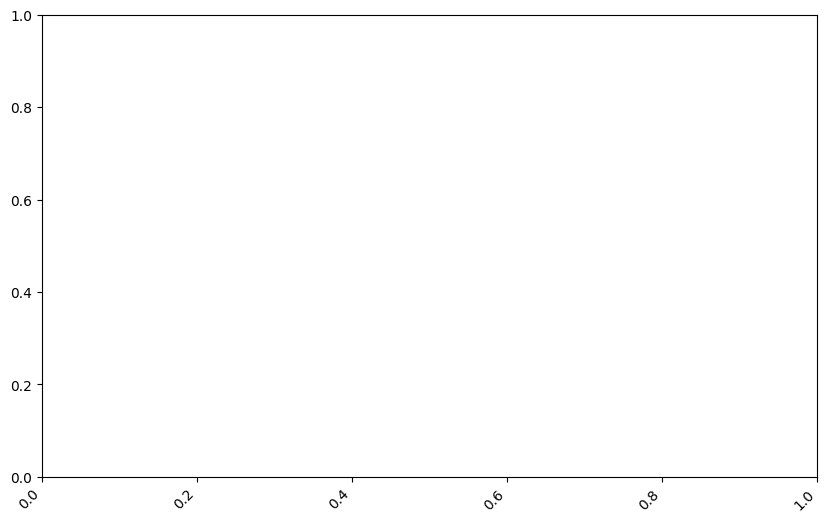

In [34]:
# Visualising the results
# Adjust the figure size to accommodate the x-axis labels
plt.figure(figsize=(10, 6))  # Set the desired figure size

# Rotate the tick labels and align them to the right
plt.xticks(rotation=45, ha='right')

plt.plot(df.loc[60:, 'Year'],dataset_test.values, color = 'red', label = 'Real Domestic Debt Value')
plt.plot(df.loc[60:, 'Year'],predicted_value, color = 'blue', label = 'Predicted Domestic Debt Value')
plt.xticks(np.arange(0,40,4))
plt.title('Domestic Debt Value Prediction')
plt.xlabel('Time')
plt.ylabel('Domestic Debt Value')
plt.legend()


plt.show()

In [ ]:
# Extend the dataset to include the future time period
dataset_extended = pd.concat([dataset_total, pd.DataFrame(inputs)], axis=0)

# Generate future time steps for prediction
future_steps = 5 * 4  # 5 years * 4 quarters/year

# Initialize an array to store the predicted values
predictions = []

# Make predictions for each future time step
for _ in range(future_steps):
    # Reshape the input data to match the model's input shape
    input_data = dataset_extended[-60:].values
    input_data = input_data.reshape(1, -1, 1)

    # Use the model to make predictions
    predicted_value = model.predict(input_data)

    # Append the predicted value to the predictions array
    predictions.append(predicted_value[0, 0])

    # Update the input data with the predicted value for the next time step
    dataset_extended = pd.concat([dataset_extended, pd.DataFrame(predicted_value)], axis=0)

# Convert the predictions array to a numpy array
predictions = np.array(predictions)

# Print the predicted values for the future period
print(predictions)
